In this notebook, we will plot the results of the experiments comparing the LCEGP w/
lookahead PCS with the alternative contextual RS algorithms from the literature.

In [1]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()

plot_kwargs = {
    "LCEGP": {"marker": "^", "color": u'#1f77b4'},
    "Li": {"color": u'#ff7f0e'},
    "Gao": {"color": u'#2ca02c'},
    "LCEGP_IKG": {"marker": "o", "color": u'#d62728'},
    "LCEGP_Adam": {"ls": "--", "marker": "+", "color": u'#9467bd'},
    "LCEGP_reuse": {"ls": "-.", "marker": "s", "color": u'#8c564b'}
}
# u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf'

def plot_experiment(
    dirname: str, plot_idcs: list = None, empirical_pcs: bool = False, limit: int = None,
) -> Tensor:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]

    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")
    labels = output_dicts[0]["labels"]
    label_count = len(labels)

    # plot final values, averaged over replications.
    # final values is a list of tensors, one tensor per label
    if empirical_pcs:
        key = "correct_selection"
    else:
        key = "pcs_estimates"
    final_value_shape = output_dicts[0][key][0].shape
    limit = limit or output_count
    all_results = torch.zeros(label_count, limit, *final_value_shape)
    num_skipped = 0

    for j, out_dict in enumerate(output_dicts[:limit]):
        if out_dict["labels"] != labels:
            print(f"{j}th output labels do not agree! Skipping!")
            num_skipped += 1
            continue
        for i in range(label_count):
                all_results[i, j] = out_dict[key][i].cpu()

    # average to get the plot values
    if empirical_pcs:
        # treating it as the expected PCS for now.
        plot_values = all_results.mean(dim=1).mean(dim=-1)

    else:
        plot_values = all_results.mean(dim=1)

    # account for skipped entries - otherwise they'd be counted as zeros.
    plot_values = plot_values * limit / (limit - num_skipped)
    print(f"Plotting {limit - num_skipped} outputs!")

    # plot
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    if plot_idcs is None:
        plot_idcs = list(range(label_count))

    for i in plot_idcs:
        plt.plot(plot_values[i], label=labels[i], **plot_kwargs[labels[i]])
    plt.grid()
    plt.legend()
    plt.show()
    return all_results


Config: 
 {
    "iterations": 100,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4
}
Read 40 output files.
Plotting 40 outputs!
Config: 
 {
    "iterations": 100,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4
}
Read 40 output files.
Plotting 40 outputs!


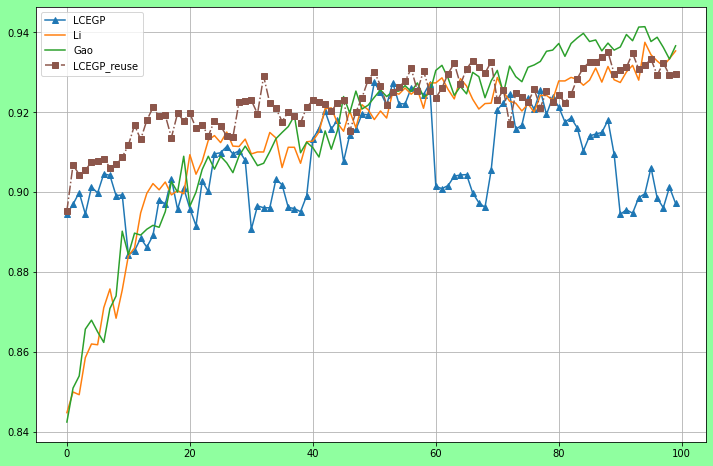

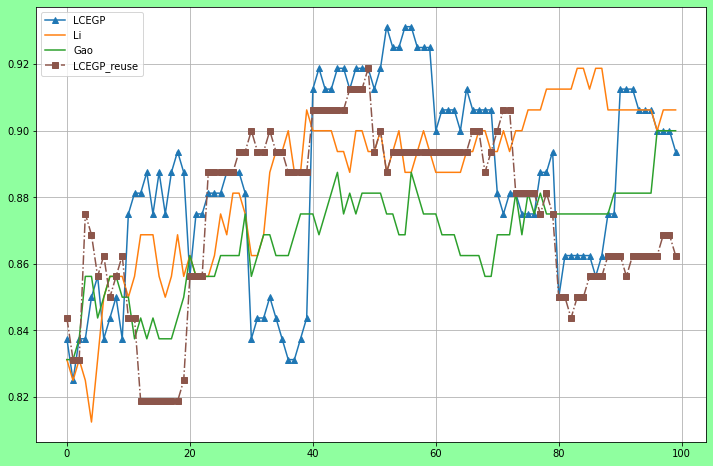

In [2]:
_ = plot_experiment("config_0")
_ = plot_experiment("config_0", empirical_pcs=True)

Config: 
 {
    "iterations": 100,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "randomize_ties": 1
}
Read 40 output files.
Plotting 40 outputs!
Config: 
 {
    "iterations": 100,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "randomize_ties": 1
}
Read 40 output files.
Plotting 40 outputs!


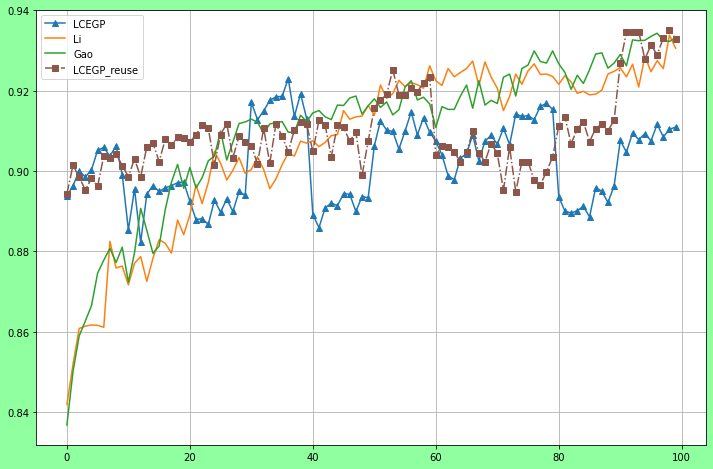

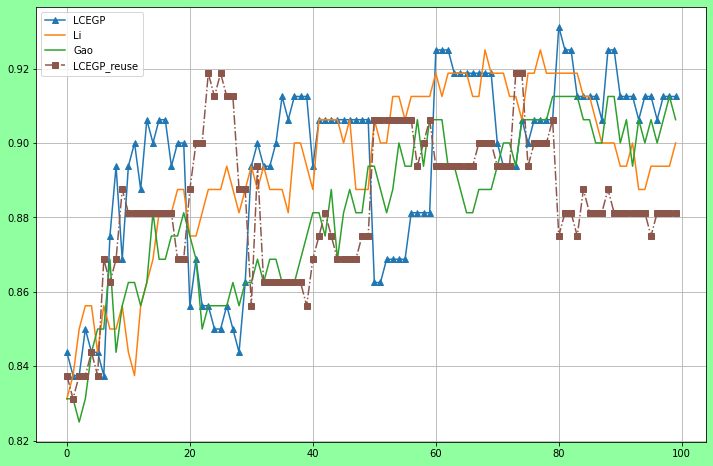

In [3]:
_ = plot_experiment("config_00")
_ = plot_experiment("config_00", empirical_pcs=True)

Config: 
 {
    "iterations": 100,
    "fit_frequency": 10,
    "fit_tries": 5,
    "num_arms": 4,
    "num_contexts": 4,
    "randomize_ties": 1
}
Read 60 output files.
Plotting 60 outputs!
Config: 
 {
    "iterations": 100,
    "fit_frequency": 10,
    "fit_tries": 5,
    "num_arms": 4,
    "num_contexts": 4,
    "randomize_ties": 1
}
Read 60 output files.
Plotting 60 outputs!


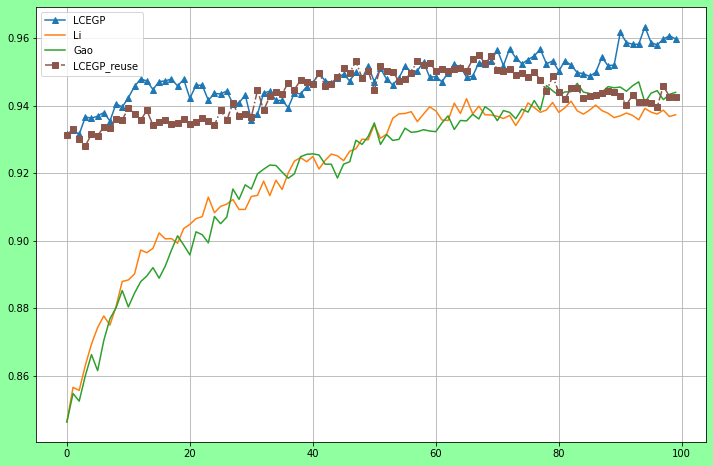

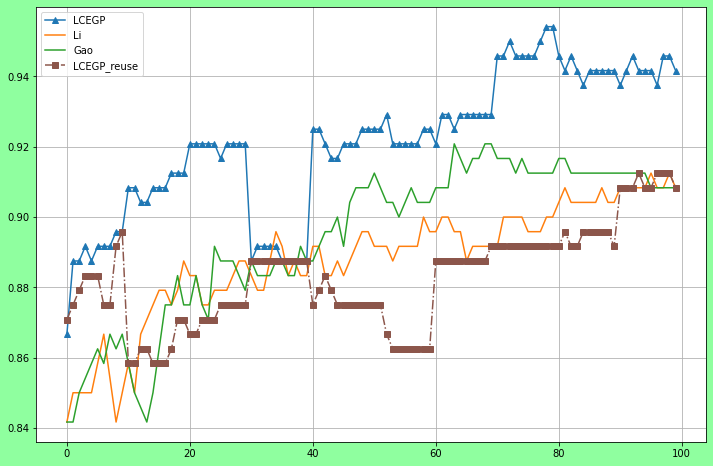

In [4]:
_ = plot_experiment("config_000")
_ = plot_experiment("config_000", empirical_pcs=True)

In [5]:
# _ = plot_experiment("config_1")
# _ = plot_experiment("config_1", empirical_pcs=True)


Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 1,
    "randomize_ties": 1
}
Read 19 output files.
Plotting 19 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 1,
    "randomize_ties": 1
}
Read 19 output files.
Plotting 19 outputs!


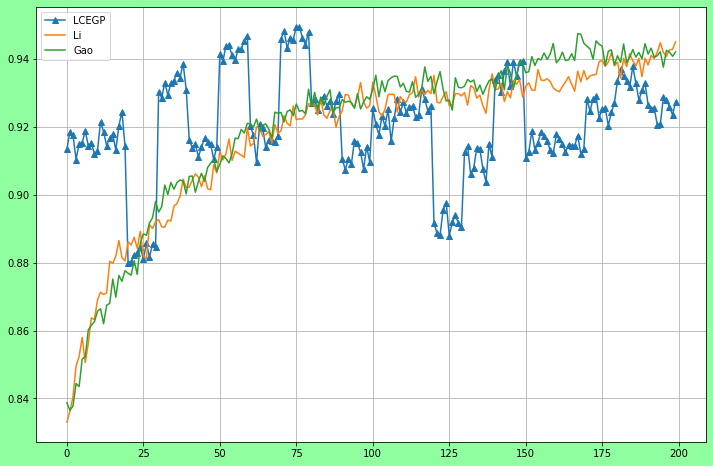

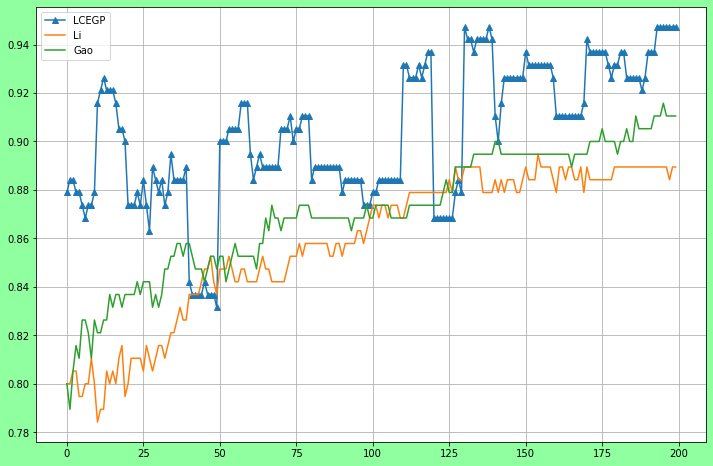

In [6]:
_ = plot_experiment("config_2")
_ = plot_experiment("config_2", empirical_pcs=True)

Using certainty equivalent approximation from here on.w

In [7]:
# _ = plot_experiment("config_3")
# _ = plot_experiment("config_3", empirical_pcs=True)

Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 8,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 30 output files.
Plotting 30 outputs!
Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 8,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 30 output files.
Plotting 30 outputs!


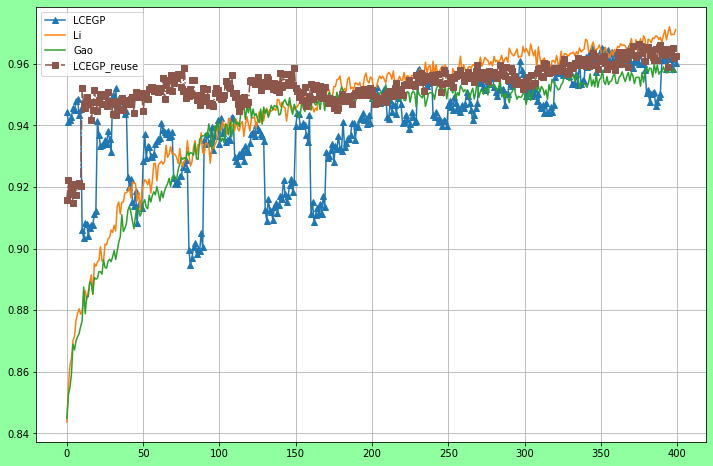

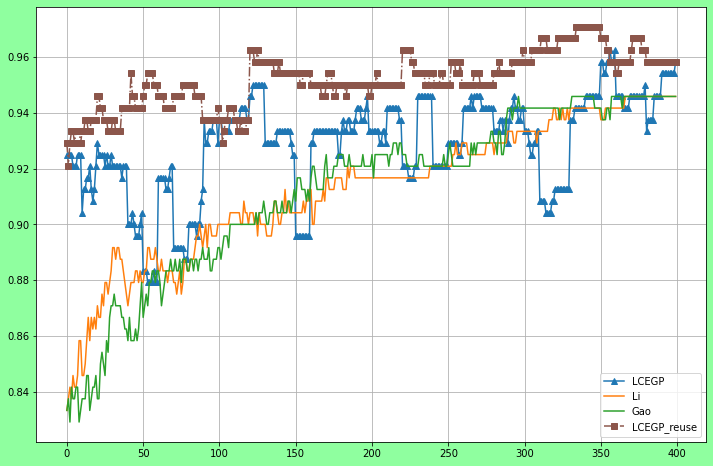

In [8]:
_ = plot_experiment("config_4")
_ = plot_experiment("config_4", empirical_pcs=True)

Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!


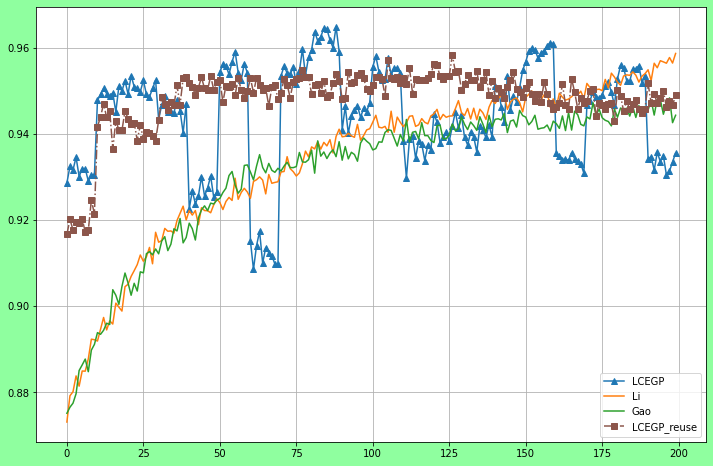

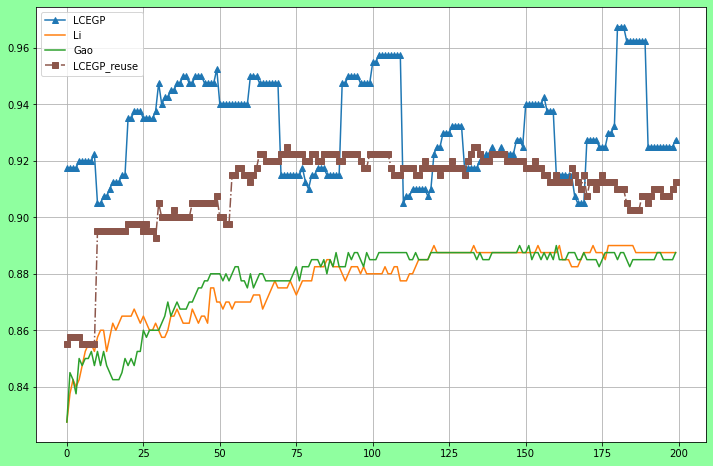

In [9]:
_ = plot_experiment("config_5")
_ = plot_experiment("config_5", empirical_pcs=True)

These are various tests with fitting LCEGP.

No re-training of hyper-parameters:

Config: 
 {
    "iterations": 400,
    "fit_frequency": 500,
    "num_arms": 4,
    "num_contexts": 8,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 30 output files.
Plotting 30 outputs!
Config: 
 {
    "iterations": 400,
    "fit_frequency": 500,
    "num_arms": 4,
    "num_contexts": 8,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 30 output files.
Plotting 30 outputs!


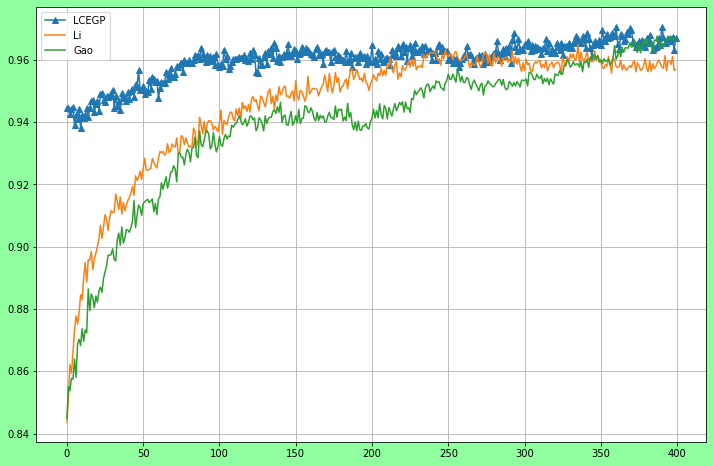

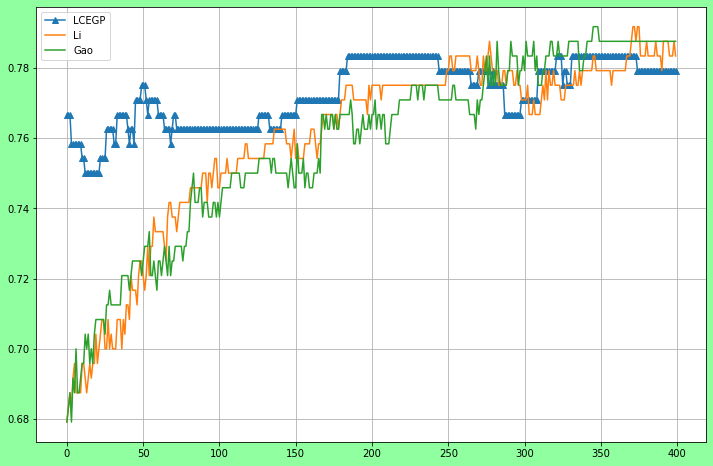

In [10]:
_ = plot_experiment("config_6")
_ = plot_experiment("config_6", empirical_pcs=True)


Re-train every 25 iterations with 10 fit tries. Shows some promise.

This is otherwise the same experiment as config_1. Plotted again for comparison.

Config: 
 {
    "iterations": 400,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 50 output files.
Plotting 50 outputs!
Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "batch_size": 5
}
Read 30 output files.
Plotting 30 outputs!
Config: 
 {
    "iterations": 400,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 50 output files.
Plotting 50 outputs!
Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 4,
    "batch_size": 5
}
Read 30 output files.
Plotting 30 outputs!


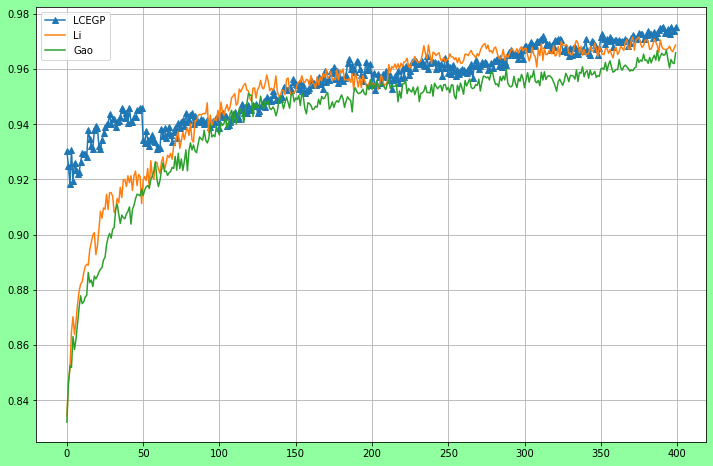

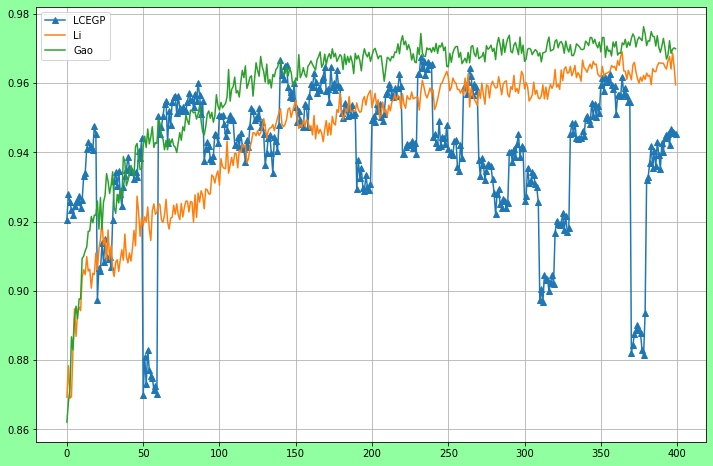

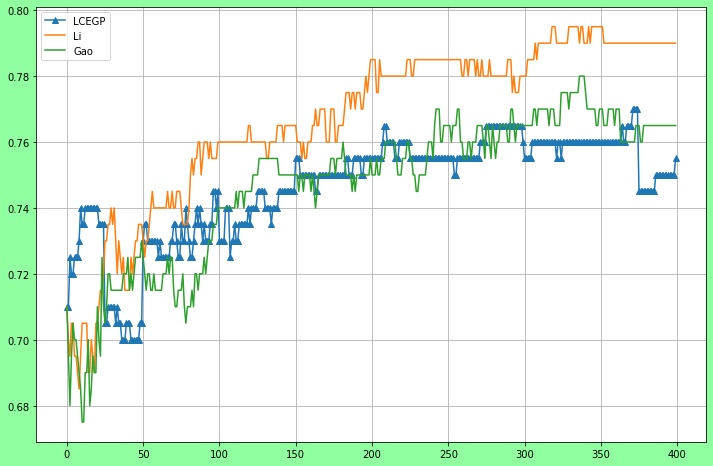

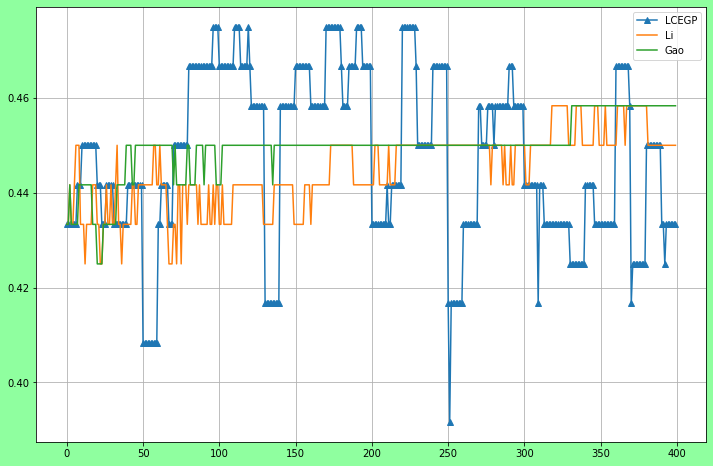

In [11]:
_ = plot_experiment("config_7")
_ = plot_experiment("config_1")

_ = plot_experiment("config_7", empirical_pcs=True)
_ = plot_experiment("config_1", empirical_pcs=True)


Re-train every 25 iterations with 5 fit tries.

Same setting as config_5.

Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 5,
    "num_arms": 4,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 100 output files.
Plotting 100 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 5,
    "num_arms": 4,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 100 output files.
Plotting 100 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!


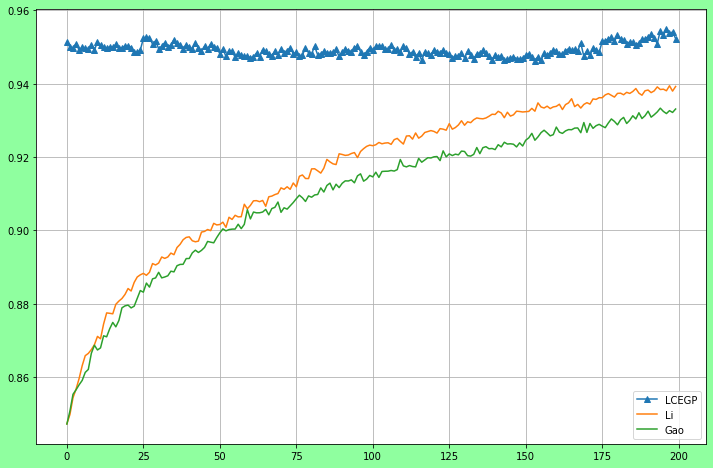

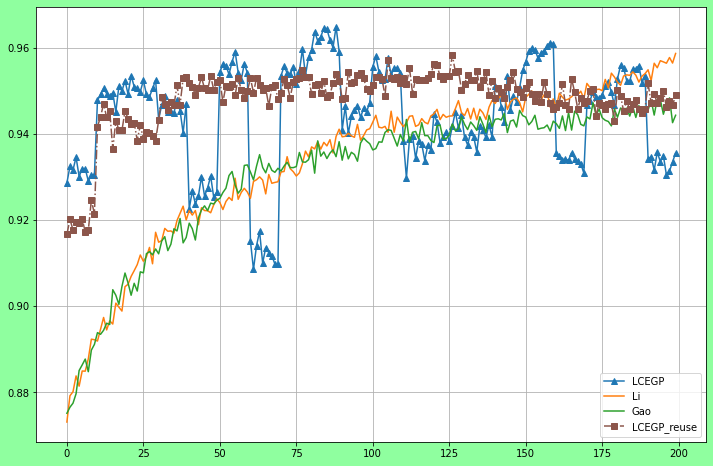

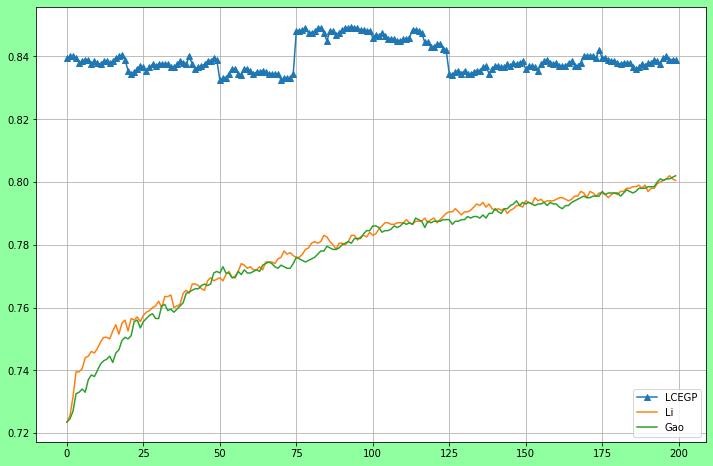

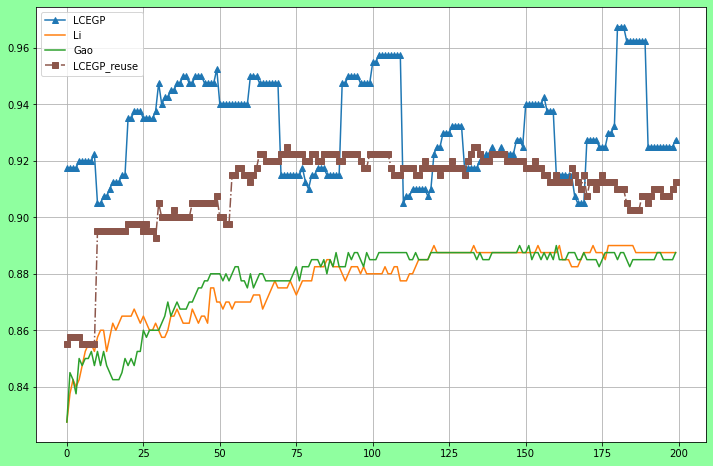

In [12]:
_ = plot_experiment("config_8")
_ = plot_experiment("config_5")

_ = plot_experiment("config_8", empirical_pcs=True)
_ = plot_experiment("config_5", empirical_pcs=True)


## Adding some more experiments with a bit more replications.

Config: 
 {
    "iterations": 400,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 100 output files.
Plotting 100 outputs!
Config: 
 {
    "iterations": 400,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 100 output files.
Plotting 100 outputs!


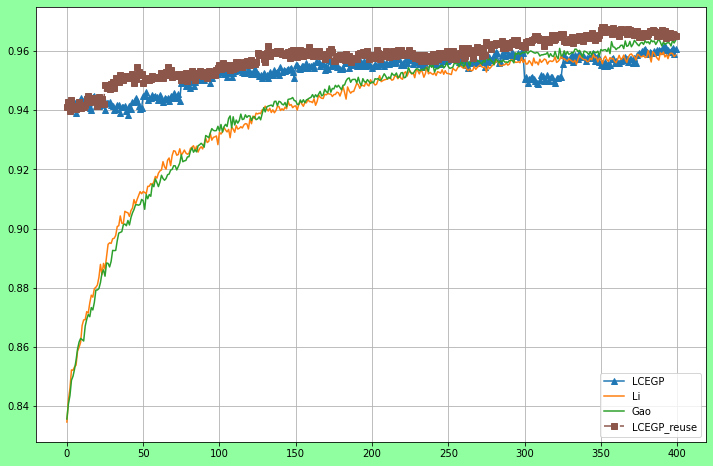

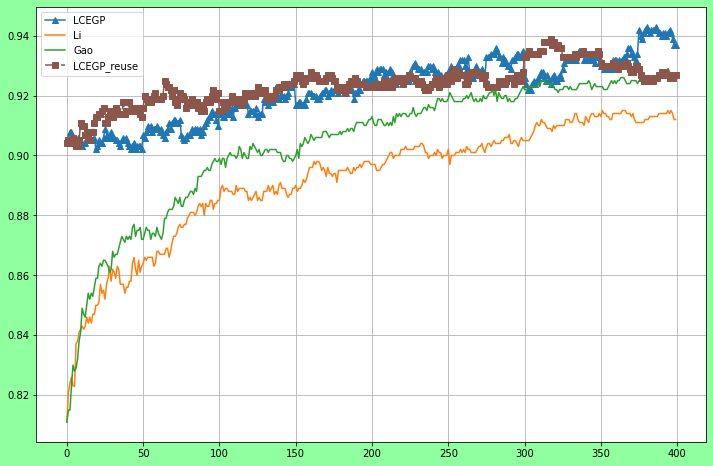

In [13]:
_ = plot_experiment("config_9", empirical_pcs=False)
_ = plot_experiment("config_9", empirical_pcs=True)

Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 16
}
Read 50 output files.
Plotting 50 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 16
}
Read 50 output files.
Plotting 50 outputs!


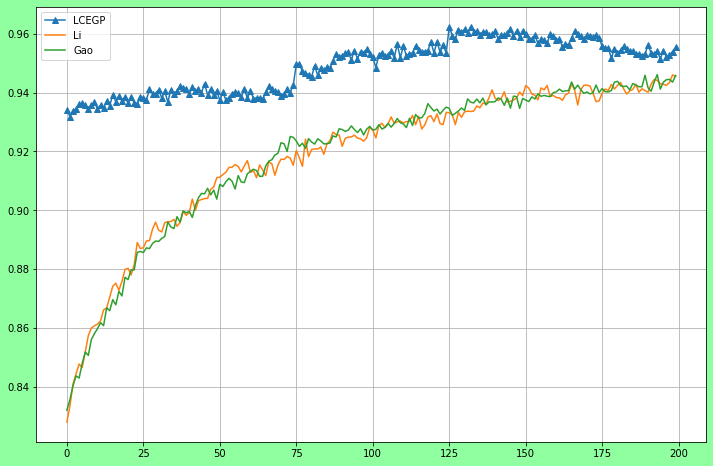

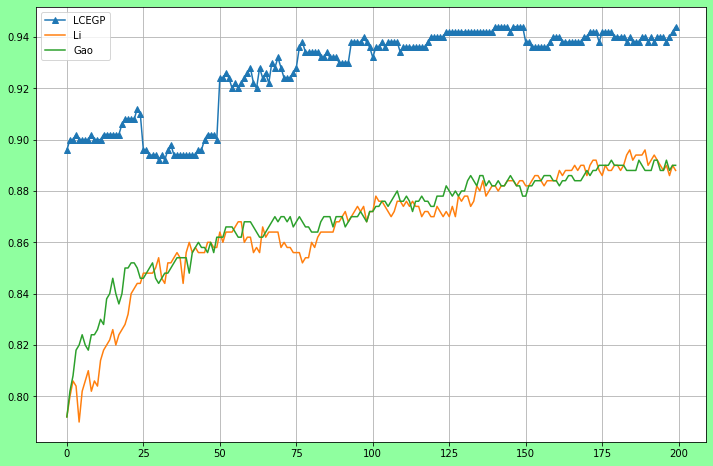

In [14]:
_ = plot_experiment("config_10", empirical_pcs=False)
_ = plot_experiment("config_10", empirical_pcs=True)

Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 10,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 10,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!


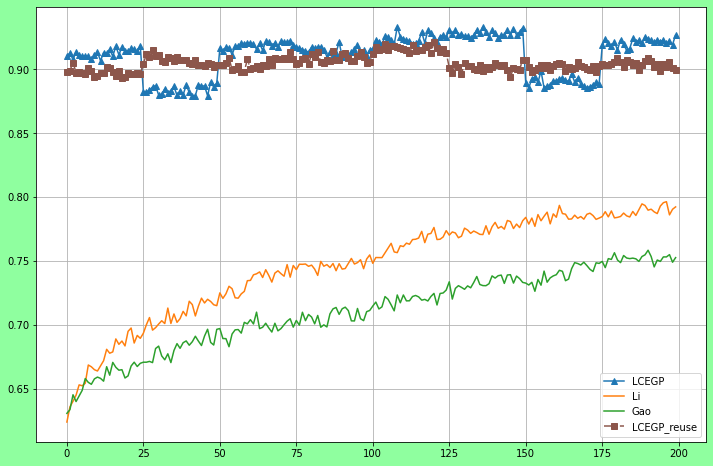

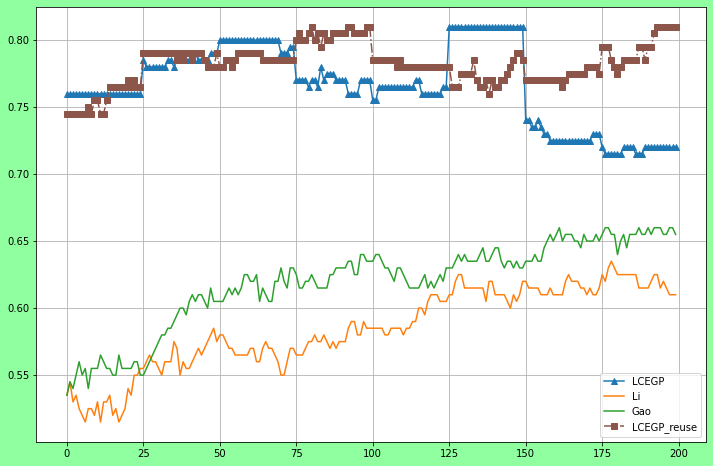

In [15]:
_ = plot_experiment("config_11", empirical_pcs=False)
_ = plot_experiment("config_11", empirical_pcs=True)


Config 12 is same as 9, except with 1 fit tries instead of 10 and fewer iterations.

We see a slight bit of loss in performance here.

Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 1,
    "num_arms": 4,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 50 output files.
2th output labels do not agree! Skipping!
4th output labels do not agree! Skipping!
5th output labels do not agree! Skipping!
6th output labels do not agree! Skipping!
10th output labels do not agree! Skipping!
12th output labels do not agree! Skipping!
13th output labels do not agree! Skipping!
15th output labels do not agree! Skipping!
17th output labels do not agree! Skipping!
18th output labels do not agree! Skipping!
20th output labels do not agree! Skipping!
32th output labels do not agree! Skipping!
33th output labels do not agree! Skipping!
34th output labels do not agree! Skipping!
35th output labels do not agree! Skipping!
38th output labels do not agree! Skipping!
42th output labels do not agree! Skipping!
45th output labels do not agree! Skipping!
48th output labels do not agree! Skippi

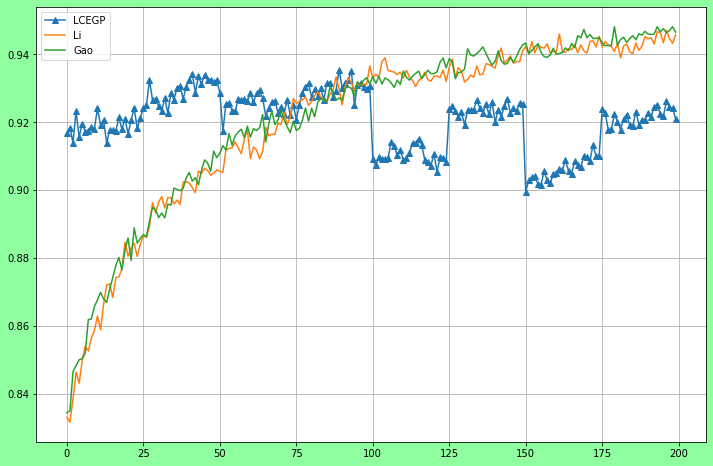

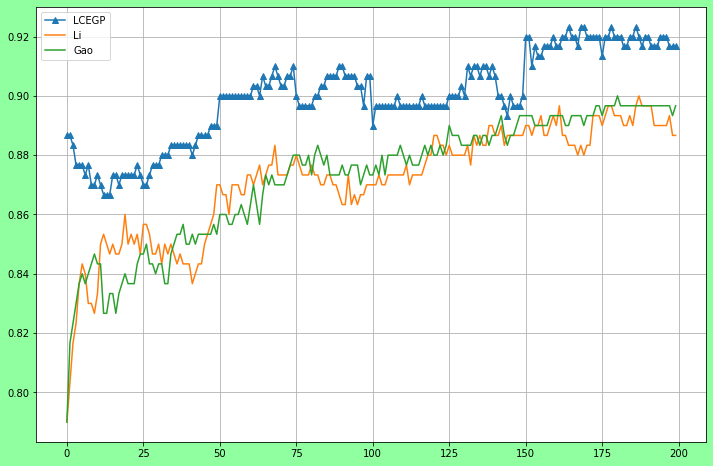

In [16]:
_ = plot_experiment("config_12", empirical_pcs=False)
_ = plot_experiment("config_12", empirical_pcs=True)

Config: 
 {
    "iterations": 100,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 6,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!
Config: 
 {
    "iterations": 100,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 6,
    "num_contexts": 20,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 20 output files.
Plotting 20 outputs!


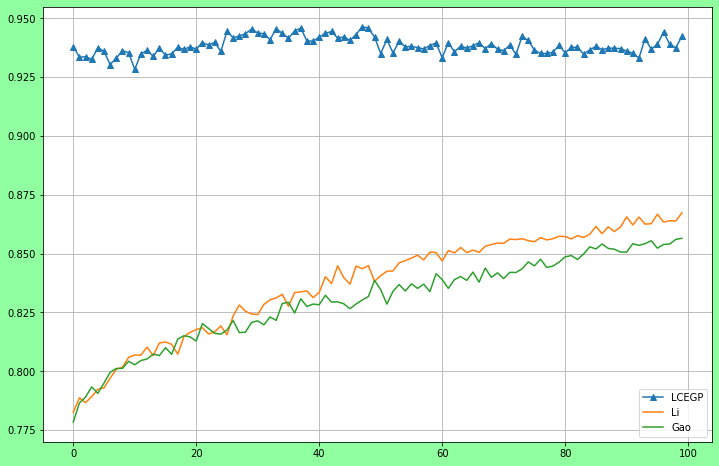

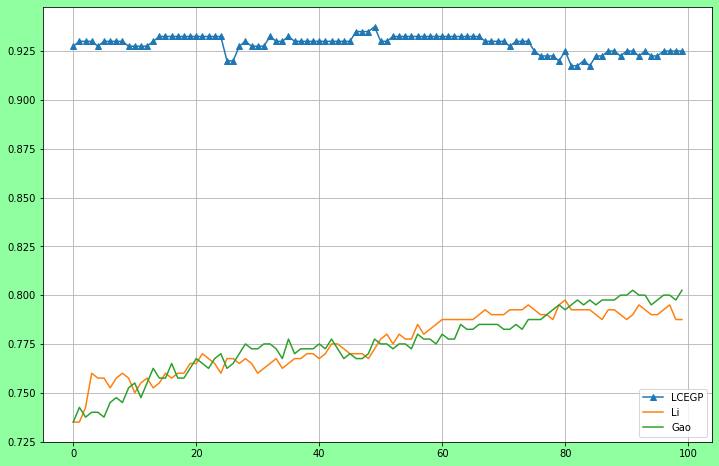

In [17]:
_ = plot_experiment("config_13", empirical_pcs=False)
_ = plot_experiment("config_13", empirical_pcs=True)

Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 10,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0,
    "randomize_ties": 1
}
Read 15 output files.
Plotting 15 outputs!
Config: 
 {
    "iterations": 200,
    "fit_frequency": 25,
    "fit_tries": 10,
    "num_arms": 10,
    "num_contexts": 10,
    "batch_size": 5,
    "num_fantasies": 0,
    "randomize_ties": 1
}
Read 15 output files.
Plotting 15 outputs!


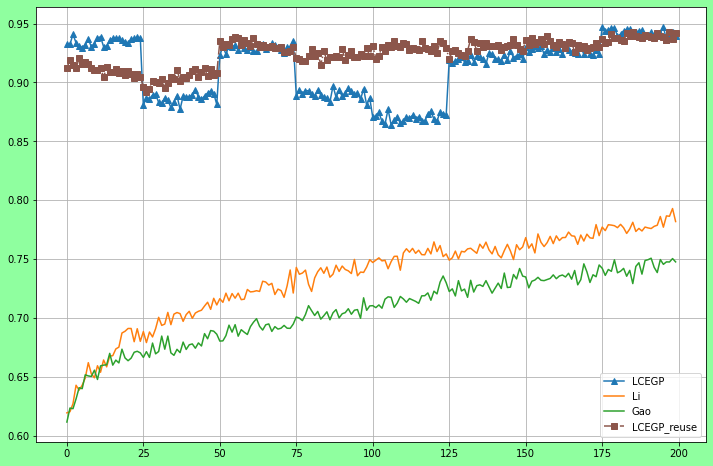

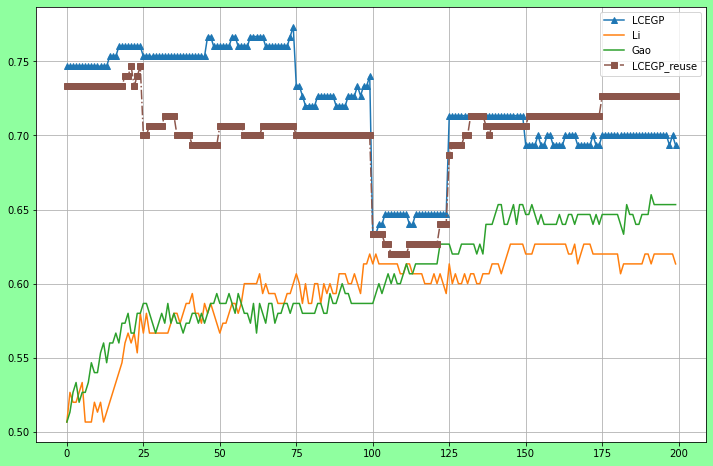

In [18]:
_ = plot_experiment("config_14", empirical_pcs=False)
_ = plot_experiment("config_14", empirical_pcs=True)